<a href="https://colab.research.google.com/github/DeepikaSaraswat/OBJECT-DETECTION/blob/main/Object_Detection_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt

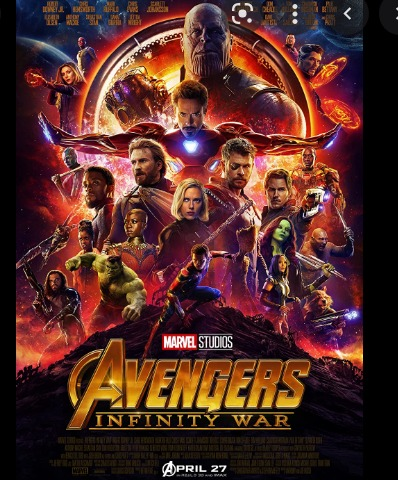

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/r.jpeg')
cv2_imshow(image)

In [ ]:
image.shape

(480, 398, 3)

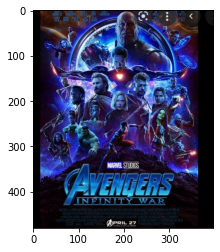

In [ ]:
plt.imshow(image)

In [ ]:
# Converting the color

In [ ]:
new_image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

In [ ]:
new_image1 = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

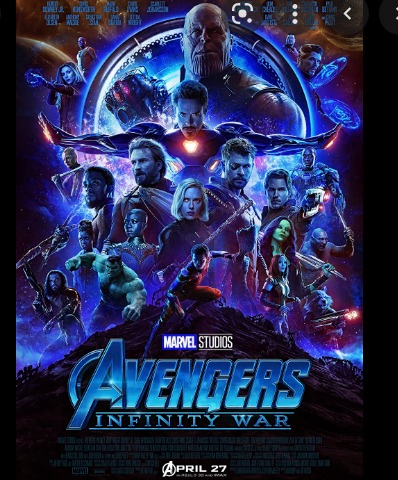

In [ ]:
cv2_imshow(new_image1)

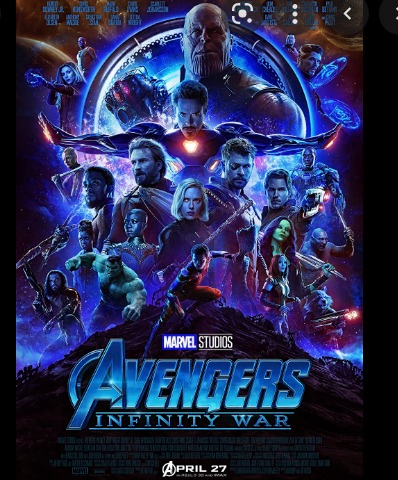

In [ ]:
cv2_imshow(new_image)

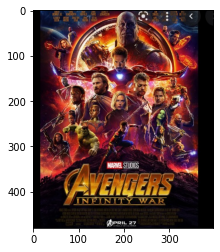

In [ ]:
plt.imshow(new_image)

In [ ]:
new_image.shape

(480, 398, 3)

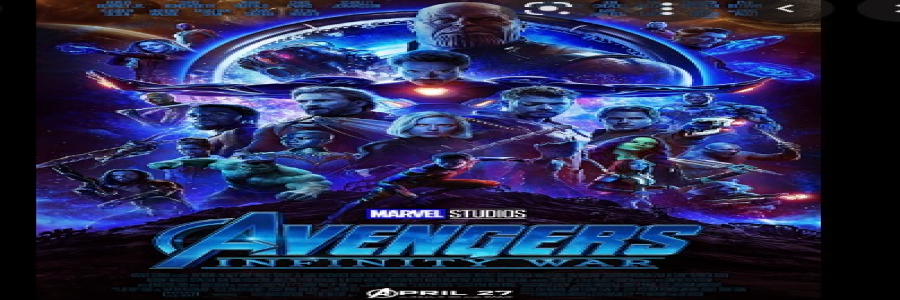

(300, 900, 3)

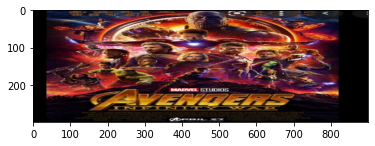

In [ ]:
# Resizing of image
im = cv2.resize(new_image,(900,300),interpolation = cv2.INTER_AREA) # w and h
cv2_imshow(im)
plt.imshow(im)
im.shape # h and w

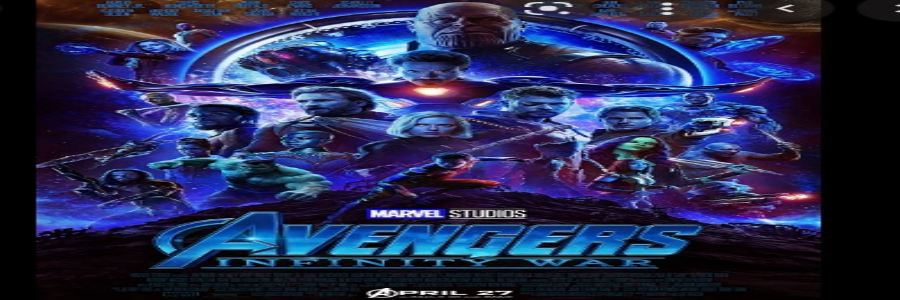

(300, 900, 3)

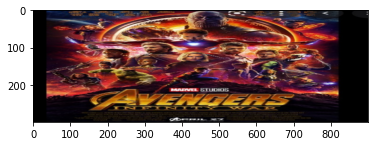

In [ ]:
# Resizing of image
im = cv2.resize(new_image,(900,300)) # w and h
cv2_imshow(im)
plt.imshow(im)
im.shape # h and w

In [ ]:
new_image.shape

(480, 398, 3)

In [ ]:
new_image.shape[1]/2 # as we are getting a float so we need to convert it into the int

199.0

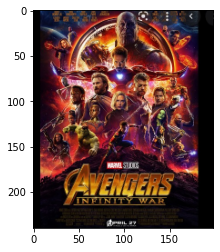

In [ ]:
w = int(new_image.shape[1]/2)
h = int(new_image.shape[0]/2)
dim = (w,h)
im = cv2.resize(new_image,dim)
plt.imshow(im)

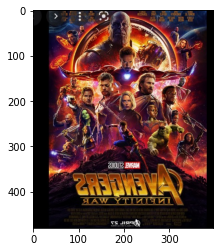

In [ ]:
im1 = cv2.flip(new_image,1)
plt.imshow(im1)

In [ ]:
yolo = cv2.dnn_DetectionModel('/content/yolov3-tiny.weights','/content/yolov3-tiny.cfg.txt')

In [ ]:
yolo.setInputSize(320,320)
yolo.setInputScale(1/273)
yolo.setInputMean((0,0,0)) # something we need tpo do to run tis code
yolo.setInputSwapRB(True)

< cv2.dnn.Model 0x7f25c9370f90>

In [ ]:
# classId - for eg = in list classses we have person on 1st positon so - classId = 1
# bbox = rectangle box around the image
# confThreshold = ki image jo pass kari hai vo 50 % match kar rhi hai ya kitni match karni chahie

In [ ]:
classes = []
with open('/content/coco.names.txt','r') as f:
  classes = f.read().splitlines()


In [ ]:
len(classes)

80

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
im = cv2.imread('/content/dog.jpeg')
classIds,conf,bbox = yolo.detect(im,confThreshold = 0.5)
print(classIds,bbox)

[16] [[ 24  26 192 200]]


In [ ]:
classes[16]

'dog'

In [ ]:
classIds.shape
classIds # list containing only Id = 16

array([16], dtype=int32)

In [ ]:
conf.shape
conf

array([0.50623614], dtype=float32)

In [ ]:
bbox # inn cheezo se ek box banega

array([[ 24,  26, 192, 200]], dtype=int32)

In [ ]:
# as we have 3 diff lists now so we will be iterating over all three lists

for i in classIds:
  print(i)

16


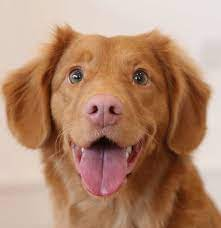

In [ ]:
cv2_imshow(im)

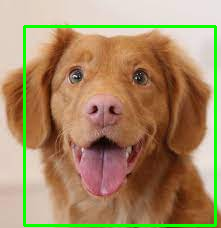

In [ ]:
for i,j,k in zip(classIds.flatten(),conf.flatten(),bbox):
  cv2.rectangle(im,k,color = (1,995,9),thickness = 2)
cv2_imshow(im)

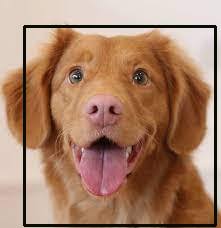

In [ ]:
for i,j,k in zip(classIds.flatten(),conf.flatten(),bbox):
  cv2.rectangle(im,k,color = (1,12,9),thickness = 2)
cv2_imshow(im)

In [ ]:
classIds

array([16], dtype=int32)

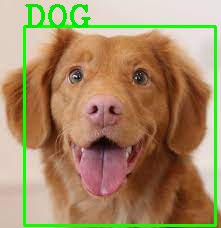

In [ ]:
# Now to add your text we will be doing ;
for i,j,k in zip(classIds.flatten(),conf.flatten(),bbox):
  cv2.rectangle(im,k,color = (1,995,9),thickness = 2)
  # cv2.putText(image,list ka obj,position of text - (x,y),Font,scale = text kitna bada hoga,color = green = (0,255,0),thickness = 2)
  cv2.putText(im,classes[i].upper(),(k[0],k[1]),cv2.FONT_HERSHEY_COMPLEX,1,(0,233,0),2)
cv2_imshow(im)

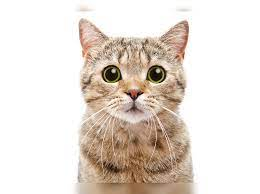

In [ ]:
im1 = cv2.imread('/content/cat.jpg')
cv2_imshow(im1)

In [ ]:
classIds,conf,bbox = yolo.detect(im1,confThreshold = 0.5)
print(classIds,bbox)

[15] [[ 72  23 128 169]]


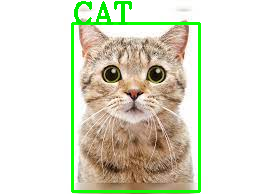

In [ ]:
# Now to add your text we will be doing ;
for i,j,k in zip(classIds.flatten(),conf.flatten(),bbox):
  cv2.rectangle(im1,k,color = (1,995,9),thickness = 2)
  # cv2.putText(image,list ka obj,position of text - (x,y),Font,scale = text kitna bada hoga,color = green = (0,255,0),thickness = 2)
  cv2.putText(im1,classes[i].upper(),(k[0],k[1]),cv2.FONT_HERSHEY_COMPLEX,1,(0,233,0),2)
cv2_imshow(im1)

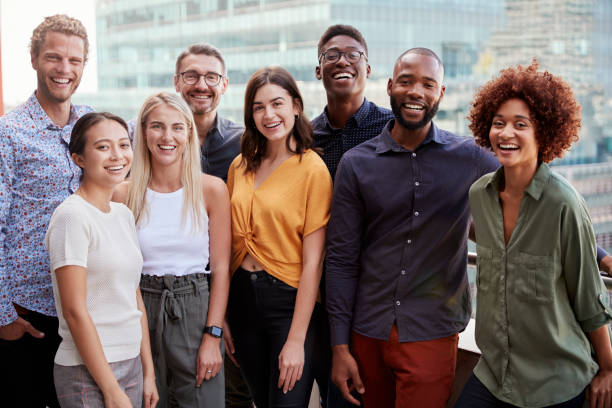

In [ ]:
im1 = cv2.imread('/content/people.jpg')
cv2_imshow(im1)

In [ ]:
classIds,conf,bbox = yolo.detect(im1,confThreshold = 0.5)
print(classIds,bbox)

[0 0 0 0 0] [[205  69 137 337]
 [317  56 171 346]
 [428  60 184 346]
 [ 23  95 136 313]
 [436 100 171 304]]


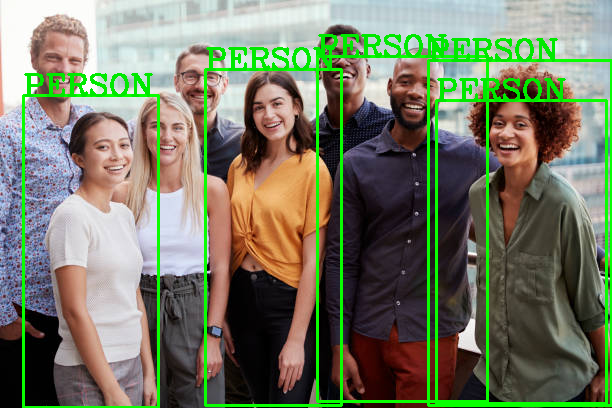

In [ ]:
# Now to add your text we will be doing ;
for i,j,k in zip(classIds.flatten(),conf.flatten(),bbox):
  cv2.rectangle(im1,k,color = (1,995,9),thickness = 2)
  # cv2.putText(image,list ka obj,position of text - (x,y),Font,scale = text kitna bada hoga,color = green = (0,255,0),thickness = 2)
  cv2.putText(im1,classes[i].upper(),(k[0],k[1]),cv2.FONT_HERSHEY_COMPLEX,1,(0,233,0),2)
cv2_imshow(im1)

In [ ]:
im1 = cv2.imread("/content/truck.png")
h, w = 400, 600
im1 = cv2.resize(im1, (w,h))

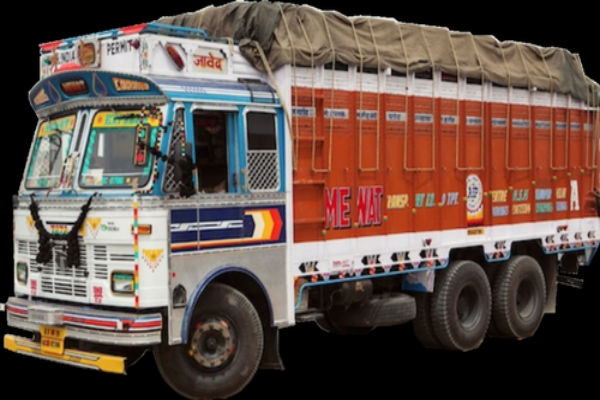

In [ ]:
cv2_imshow(im1)

In [ ]:
classIds,conf,bbox = yolo.detect(im1,confThreshold = 0.2)
print(classIds,bbox)

[7] [[  0  54 600 317]]


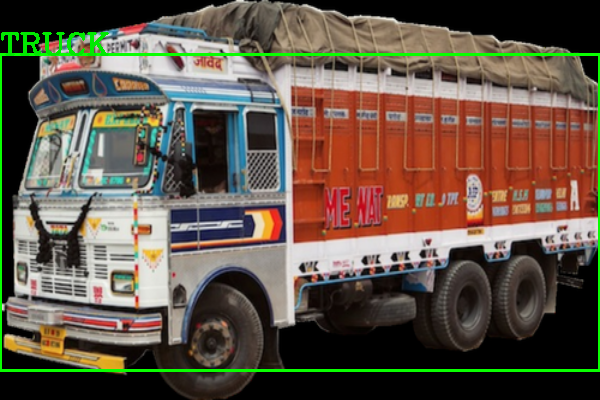

In [ ]:
# Now to add your text we will be doing ;
for i,j,k in zip(classIds.flatten(),conf.flatten(),bbox):
  cv2.rectangle(im1,k,color = (1,995,9),thickness = 2)
  # cv2.putText(image,list ka obj,position of text - (x,y),Font,scale = text kitna bada hoga,color = green = (0,255,0),thickness = 2)
  cv2.putText(im1,classes[i].upper(),(k[0],k[1]),cv2.FONT_HERSHEY_COMPLEX,1,(0,233,0),2)
cv2_imshow(im1)